# HPC Mini-Challenge 2 - Beschleunigung in Data Science
## Teil 2: GPU
#### FHNW - FS2024

Original von S. Suter, angepasst von S. Marcin und M. Stutz

Abgabe von: <font color='blue'>Studer Aaron</font>

#### Ressourcen
* [Überblick GPU Programmierung](https://www.cherryservers.com/blog/introduction-to-gpu-programming-with-cuda-and-python)
* [CUDA Basic Parts](https://nyu-cds.github.io/python-gpu/02-cuda/)
* [Accelerate Code with CuPy](https://towardsdatascience.com/heres-how-to-use-cupy-to-make-numpy-700x-faster-4b920dda1f56)
* Vorlesungen und Beispiele aus dem Informatikkurs PAC (parallel computing), siehe Ordner "resources"
* CSCS "High-Performance Computing with Python" Kurs, Tag 3: 
    - JIT Numba GPU 1 + 2
    - https://youtu.be/E4REVbCVxNQ
    - https://github.com/eth-cscs/PythonHPC/tree/master/numba-cuda
    - Siehe auch aktuelles Tutorial von 2021
* [Google CoLab](https://colab.research.google.com/) oder ggf. eigene GPU.


In [1]:
!pip install numba

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Dummy Beispiel zum testen mit Numba
import math
from numba import vectorize
import numpy as np

@vectorize(['float32(float32)'], target='cuda')
def gpu_sqrt(x):
    return math.sqrt(x)
  

a = np.arange(4096,dtype=np.float32)
gpu_sqrt(a)

/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


array([ 0.       ,  1.       ,  1.4142135, ..., 63.97656  , 63.98437  ,
       63.992188 ], dtype=float32)

### 5 GPU Rekonstruktion

Implementiere eine SVD-Rekonstruktionsvariante auf der GPU oder in einem hybriden Setting. Code aus dem ersten Teil darf dabei verwendet werden. Wähle  bewusst, welche Teile des Algorithms in einem GPU Kernel implementiert werden und welche effizienter auf der CPU sind. Ziehe dafür Erkenntnisse aus dem ersten Teil mit ein. Es muss mindestens eine Komponente des Algorithmuses in einem GPU-Kernel implementiert werden. Dokumentiere Annahmen, welche du ggf. zur Vereinfachung triffst. Evaluiere, ob du mit CuPy oder Numba arbeiten möchtest.

Links:
* [Examples: Matrix Multiplikation](https://numba.readthedocs.io/en/latest/cuda/examples.html)

Ich habe 5 verschiedene Testfälle erstellt, die unterschiedliche Szenarien abdecken:

- Kleine Matrizen (128x128): Gute Baseline für schnelle Operationen
- Mittelkleine rechteckige Matrizen (512x256 * 256x512): Testet nicht-quadratische Matrizen
- Mittlere Matrizen (1024x1024): Übliche Größe für viele Anwendungen
- Große rechteckige Matrizen (2048x1536 * 1536x512): Testet verschiedene Dimensionen mit größeren Matrizen
- Maximale Matrizen (4000x4000): Testet die angegebene Obergrenze

Jeder Testfall:

- Erstellt zufällige Matrizen mit cp.random oder np.random
- Nutzt automatisch CUDA, falls verfügbar
- Gibt das Ergebnis der Matrixmultiplikation zurück

In [ ]:
paperspace@psxnjqiaev3w:~/working_dir/hs24-mc2/Work_Aaron/Exercise_1$ python3 Exercise_1.py
Starting benchmarks...

Running CuPy benchmarks...
CuPy detected 1 CUDA device(s)
Device 0: Quadro RTX 4000

Running CUPY benchmarks:
==================================================

Executing Small (128x128)
Warming up GPU...
Warmup complete
Run 1: 0.23 ms
Run 2: 0.22 ms
Run 3: 0.21 ms

Executing Medium-small (512x256 * 256x512)
Warming up GPU...
Warmup complete
Run 1: 0.38 ms
Run 2: 0.34 ms
Run 3: 0.34 ms

Executing Medium (1024x1024)
Warming up GPU...
Warmup complete
Run 1: 0.97 ms
Run 2: 0.95 ms
Run 3: 0.95 ms

Executing Large rectangular (2048x1536 * 1536x512)
Warming up GPU...
Warmup complete
Run 1: 1.46 ms
Run 2: 1.55 ms
Run 3: 1.46 ms

Executing Maximum (4000x4000)
Warming up GPU...
Warmup complete
Run 1: 21.03 ms
Run 2: 20.26 ms
Run 3: 21.27 ms

Running Numba benchmarks...
CUDA available for Numba
Current device: b'Quadro RTX 4000'

Running NUMBA benchmarks:
==================================================

Executing Small (128x128)
Warming up GPU...
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Warmup complete
Run 1: 1.67 ms
Run 2: 1.64 ms
Run 3: 1.61 ms

Executing Medium-small (512x256 * 256x512)
Warming up GPU...
Warmup complete
Run 1: 9.02 ms
Run 2: 9.06 ms
Run 3: 9.32 ms

Executing Medium (1024x1024)
Warming up GPU...
Warmup complete
Run 1: 83.40 ms
Run 2: 81.81 ms
Run 3: 83.49 ms

Executing Large rectangular (2048x1536 * 1536x512)
Warming up GPU...
Warmup complete
Run 1: 142.08 ms
Run 2: 143.19 ms
Run 3: 148.23 ms

Executing Maximum (4000x4000)
Warming up GPU...
Warmup complete
Run 1: 2099.00 ms
Run 2: 2087.01 ms
Run 3: 2104.43 ms

Generating comparative visualization...

Detailed Statistics:
================================================================================
                                  Test Case CuPy Mean (ms) Numba Mean (ms) Speedup (CuPy/Numba)
0                           Small (128x128)    0.22 ± 0.01     1.64 ± 0.02                7.52x
1          Medium-small (512x256 * 256x512)    0.35 ± 0.02     9.13 ± 0.14               25.80x
2                        Medium (1024x1024)    0.96 ± 0.01    82.90 ± 0.77               86.62x
3  Large rectangular (2048x1536 * 1536x512)    1.49 ± 0.04   144.50 ± 2.68               97.13x
4                       Maximum (4000x4000)   20.85 ± 0.43  2096.81 ± 7.28              100.55x

<font color='blue'>
Also man sieht eigentlich ziemlich klar, das man mit CUPY viel schneller ist in dem ersten Run. Aber nach ein bisschen Recherche habe ich festgestellt, dass es damit zusammenhängen muss (https://numba.pydata.org/numba-doc/dev/cuda/examples.html) mit dem Device Memory. Diese Implementierung von der numba Matrix Multiplikation ist einfach und intuitiv, hat aber eine schlechte Leistung, da dieselben Matrixelemente mehrfach aus dem Gerätespeicher geladen werden, was langsam ist. In der Nächsten Auswertung habe ich das ganze nochmals probiert mit der vorgeschlagenen Lösung aus (https://numba.pydata.org/numba-doc/dev/cuda/examples.html).

Also jeglichen Code lasse ich vor dem Measurement noch 10 mal im WarmUp laufen. Nach der Absprache mit @Simon Marcin, hat er mich darauf hingewiesen. (https://forums.developer.nvidia.com/t/why-warm-up/48565/4)</font>

In [ ]:
paperspace@psxnjqiaev3w:~/working_dir/hs24-mc2/Work_Aaron/Exercise_1_v2$ python3 Exercise_1.py
Starting benchmarks...

Running CuPy benchmarks...
CuPy detected 1 CUDA device(s)
Device 0: Quadro RTX 4000

Running CUPY benchmarks:
==================================================

Executing Small (128x128)
Warming up GPU...
Warmup complete
Run 1: 0.24 ms
Run 2: 0.22 ms
Run 3: 0.21 ms

Executing Medium-small (512x256 * 256x512)
Warming up GPU...
Warmup complete
Run 1: 0.43 ms
Run 2: 0.37 ms
Run 3: 0.37 ms

Executing Medium (1024x1024)
Warming up GPU...
Warmup complete
Run 1: 1.06 ms
Run 2: 1.05 ms
Run 3: 1.05 ms

Executing Large rectangular (2048x1536 * 1536x512)
Warming up GPU...
Warmup complete
Run 1: 1.57 ms
Run 2: 1.57 ms
Run 3: 1.57 ms

Executing Maximum (4000x4000)
Warming up GPU...
Warmup complete
Run 1: 21.30 ms
Run 2: 21.00 ms
Run 3: 20.54 ms

Running Numba benchmarks...
CUDA available for Numba
Current device: b'Quadro RTX 4000'

Running NUMBA benchmarks:
==================================================

Executing Small (128x128)
Warming up GPU...
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Warmup complete
Run 1: 1.64 ms
Run 2: 1.68 ms
Run 3: 1.64 ms

Executing Medium-small (512x256 * 256x512)
Warming up GPU...
Warmup complete
Run 1: 8.24 ms
Run 2: 9.19 ms
Run 3: 8.39 ms

Executing Medium (1024x1024)
Warming up GPU...
Warmup complete
Run 1: 70.09 ms
Run 2: 68.21 ms
Run 3: 65.33 ms

Executing Large rectangular (2048x1536 * 1536x512)
Warming up GPU...
Warmup complete
Run 1: 112.78 ms
Run 2: 113.48 ms
Run 3: 114.68 ms

Executing Maximum (4000x4000)
Warming up GPU...
Warmup complete
Run 1: 1175.67 ms
Run 2: 1181.25 ms
Run 3: 1169.96 ms

Generating comparative visualization...

Detailed Statistics:
================================================================================
                                  Test Case CuPy Mean (ms) Numba Mean (ms) Speedup (CuPy/Numba)
0                           Small (128x128)    0.22 ± 0.01     1.65 ± 0.02                7.44x
1          Medium-small (512x256 * 256x512)    0.39 ± 0.03     8.61 ± 0.42               22.16x
2                        Medium (1024x1024)    1.05 ± 0.01    67.88 ± 1.96               64.55x
3  Large rectangular (2048x1536 * 1536x512)    1.57 ± 0.00   113.65 ± 0.78               72.37x
4                       Maximum (4000x4000)   20.94 ± 0.31  1175.63 ± 4.61               56.13x


Also bei der Anpassung und beim Brauchen des Sharedmemories bin ich zuerst auf diverse Probleme gestossen, mir hat nach Recherche der folgende Artikel weitergeholfen. (https://stackoverflow.com/questions/64197780/how-to-generalize-fast-matrix-multiplication-on-gpu-using-numba). Man merkt das Shared Memory ist einiges Schneller. Jedoch sind wir im Vergleich zu Cupy immernoch einiges langsamer. Durch das Shared Memory wird bei grösseren Berechnungen viel Zeit gespart. Ich werde in dem kommenden Kapitel diverse Parameter testen.

#### 5.2 GPU-Kernel Performance

##### 5.3.1 Blocks und Input-Grösse

Links: 
* [Examples: Matrix Multiplikation](https://numba.readthedocs.io/en/latest/cuda/examples.html)
* [NVIDIA Kapitel zu "Strided Access"](https://spaces.technik.fhnw.ch/multimediathek/file/cuda-best-practices-in-c)
* https://developer.nvidia.com/blog/cublas-strided-batched-matrix-multiply/
* https://developer.nvidia.com/blog/how-access-global-memory-efficiently-cuda-c-kernels/

Führe 2-3 Experimente mit unterschiedlichen Blockkonfigurationen und Grösse der Input-Daten durch. Erstelle dafür ein neues Datenset mit beliebig grossen Matrizen, da die GPU besonders geeignet ist um grosse Inputs zu verarbeiten (Verwende diese untschiedlich grossen Matrizen für alle nachfolgenden Vergeliche und Tasks ebenfalls). Messe die Performance des GPU-Kernels mittels geeigneten Funktionen. Welche Blockgrösse in Abhängigkeit mit der Input-Grösse hat sich bei dir basierend auf deinen Experimenten als am erfolgreichsten erwiesen? Welches sind deiner Meinung nach die Gründe dafür? Wie sind die Performance Unterschiede zwischen deiner CPU und GPU Implementierung? Diskutiere deine Analyse (ggf. mit Grafiken).

In [ ]:
import cupy as cp
import numpy as np
from numba import cuda, float32
import math
import time
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Test matrices configurations (M, K, N) for multiplication of shape (M,K) * (K,N)
test_matrices = [
    (5120, 5120, 5120),     # ~26M elements
    (8192, 4096, 8192),     # ~34M elements
    (10240, 10240, 10240),  # ~105M elements
    (16384, 8192, 8192),    # ~134M elements
    (20480, 20480, 20480)   # ~419M elements
]

# Block configurations to test (threads_x, threads_y)
block_configs = [
    (8, 8),     # 64 threads
    (16, 16),   # 256 threads
    (32, 16),   # 512 threads
    (32, 32)    # 1024 threads
]

def cpu_matmul(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """CPU implementation for comparison"""
    return np.matmul(A, B)

def run_gpu_experiment(A: np.ndarray, B: np.ndarray, block_size: Tuple[int, int], 
                      num_warmup: int = 3, num_runs: int = 3) -> Dict:
    """Run GPU experiment with specific block size including warmup runs"""
    TPB_x, TPB_y = block_size
    M, K = A.shape
    K, N = B.shape
    
    # Copy to device
    A_gpu = cuda.to_device(A)
    B_gpu = cuda.to_device(B)
    C_gpu = cuda.device_array((M, N), dtype=np.float32)

    # Configure grid
    threadsperblock = block_size
    blockspergrid_x = math.ceil(M / TPB_x)
    blockspergrid_y = math.ceil(N / TPB_y)
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    # Warmup runs
    print(f"Performing {num_warmup} warmup runs...")
    for _ in range(num_warmup):
        fast_matmul[blockspergrid, threadsperblock](A_gpu, B_gpu, C_gpu, TPB_x, TPB_y)
        cuda.synchronize()

    # Measurement runs
    times = []
    print(f"Performing {num_runs} measurement runs...")
    for i in range(num_runs):
        # Clear cache and synchronize
        cuda.synchronize()
        
        start = time.perf_counter()
        fast_matmul[blockspergrid, threadsperblock](A_gpu, B_gpu, C_gpu, TPB_x, TPB_y)
        cuda.synchronize()
        end = time.perf_counter()
        
        execution_time = end - start
        times.append(execution_time)
        print(f"Run {i+1}: {execution_time:.4f} seconds")

    return {
        'times': times,
        'mean': np.mean(times),
        'std': np.std(times),
        'min': np.min(times),
        'max': np.max(times)
    }

@cuda.jit
def fast_matmul(A, B, C, TPB_x, TPB_y):
    """CUDA kernel for matrix multiplication using shared memory"""
    # Define shared memory arrays
    sA = cuda.shared.array(shape=(32, 32), dtype=float32)  # Using maximum possible size
    sB = cuda.shared.array(shape=(32, 32), dtype=float32)

    x, y = cuda.grid(2)
    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    bpg = cuda.gridDim.x

    # Use actual block size for calculations
    TPB = min(TPB_x, TPB_y)

    tmp = float32(0.)
    for i in range(bpg):
        # Preload data into shared memory
        sA[ty, tx] = 0
        sB[ty, tx] = 0
        if y < A.shape[0] and (tx+i*TPB) < A.shape[1]:
            sA[ty, tx] = A[y, tx + i * TPB]
        if x < B.shape[1] and (ty+i*TPB) < B.shape[0]:
            sB[ty, tx] = B[ty + i * TPB, x]

        cuda.syncthreads()

        for j in range(TPB):
            tmp += sA[ty, j] * sB[j, tx]

        cuda.syncthreads()

    if y < C.shape[0] and x < C.shape[1]:
        C[y, x] = tmp

def run_experiments(save_results: bool = True):
    results = []
    
    for m1, m2, m3 in test_matrices:
        print(f"\nTesting matrix size: {m1}x{m2} * {m2}x{m3}")
        A = np.random.randn(m1, m2).astype(np.float32)
        B = np.random.randn(m2, m3).astype(np.float32)

        # CPU baseline
        print("\nRunning CPU baseline...")
        start = time.perf_counter()
        cpu_matmul(A, B)
        cpu_time = time.perf_counter() - start
        print(f"CPU Time: {cpu_time:.3f}s")

        # GPU experiments with different block sizes
        for block_size in block_configs:
            print(f"\nTesting block size: {block_size[0]}x{block_size[1]}")
            gpu_results = run_gpu_experiment(A, B, block_size)
            speedup = cpu_time / gpu_results['mean']
            
            results.append({
                'Matrix Size': f"{m1}x{m2}x{m3}",
                'Block Size': f"{block_size[0]}x{block_size[1]}",
                'CPU Time': cpu_time,
                'GPU Time Mean': gpu_results['mean'],
                'GPU Time Std': gpu_results['std'],
                'Speedup': speedup,
                'Elements': m1 * m2 * m3
            })
            
            print(f"Average GPU Time: {gpu_results['mean']:.4f}s (Speedup: {speedup:.2f}x)")
            print(f"Std Dev: {gpu_results['std']:.4f}s")

    results_df = pd.DataFrame(results)
    
    if save_results:
        results_df.to_csv('gpu_experiment_results.csv', index=False)
        
    return results_df

def visualize_results(df: pd.DataFrame):
    # Print detailed statistics
    print("\nDetailed Statistics:")
    print("=" * 80)
    stats = df.groupby(['Matrix Size', 'Block Size']).agg({
        'GPU Time Mean': ['mean', 'std'],
        'Speedup': ['mean', 'std']
    }).round(4)
    
    print(stats)
    
if __name__ == "__main__":
    results_df = run_experiments()
    visualize_results(results_df)

This following output is only for the BLOCK_SIZE 16 x 16. Because cuda shared has a problem with dynamic block sizes

In [ ]:
paperspace@psxnjqiaev3w:~/working_dir/hs24-mc2/Work_Aaron/Exercise_2$ python3 Exercise_2.py
Starting matrix multiplication comparison experiments...
================================================================================
Test Matrices:
  64x64 * 64x64 (~0.3M elements)
  128x128 * 128x128 (~2.1M elements)
  256x256 * 256x256 (~16.8M elements)
  512x512 * 512x512 (~134.2M elements)
  1024x1024 * 1024x1024 (~1073.7M elements)
  5120x5120 * 5120x5120 (~134217.7M elements)
  8192x4096 * 4096x8192 (~274877.9M elements)
  10240x10240 * 10240x10240 (~1073741.8M elements)

Block Configurations:
  16x16 (256 threads)

Testing matrix size: 64x64 * 64x64

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 16x16
Running basic GPU implementation...
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Running shared memory GPU implementation...
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   0.0001s (Speedup: 1.55x)
Shared GPU:  0.0001s (Speedup: 1.75x)
Cupy GPU:  0.0001s (Speedup: 1.17x)

Testing matrix size: 128x128 * 128x128

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 16x16
Running basic GPU implementation...
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   0.0002s (Speedup: 1.68x)
Shared GPU:  0.0001s (Speedup: 2.54x)
Cupy GPU:  0.0001s (Speedup: 1.89x)

Testing matrix size: 256x256 * 256x256

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 16x16
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   0.0007s (Speedup: 0.36x)
Shared GPU:  0.0002s (Speedup: 1.20x)
Cupy GPU:  0.0001s (Speedup: 1.81x)

Testing matrix size: 512x512 * 512x512

Running CPU baseline...
CPU Time: 0.001s

Testing block size: 16x16
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   0.0044s (Speedup: 0.23x)
Shared GPU:  0.0010s (Speedup: 1.01x)
Cupy GPU:  0.0002s (Speedup: 4.81x)

Testing matrix size: 1024x1024 * 1024x1024

Running CPU baseline...
CPU Time: 0.008s

Testing block size: 16x16
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   0.0259s (Speedup: 0.32x)
Shared GPU:  0.0056s (Speedup: 1.47x)
Cupy GPU:  0.0004s (Speedup: 18.26x)

Testing matrix size: 5120x5120 * 5120x5120

Running CPU baseline...
CPU Time: 0.846s

Testing block size: 16x16
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   2.3984s (Speedup: 0.35x)
Shared GPU:  0.6025s (Speedup: 1.40x)
Cupy GPU:  0.0442s (Speedup: 19.12x)

Testing matrix size: 8192x4096 * 4096x8192

Running CPU baseline...
CPU Time: 1.197s

Testing block size: 16x16
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   4.9575s (Speedup: 0.24x)
Shared GPU:  1.2558s (Speedup: 0.95x)
Cupy GPU:  0.0907s (Speedup: 13.20x)

Testing matrix size: 10240x10240 * 10240x10240

Running CPU baseline...
CPU Time: 5.124s

Testing block size: 16x16
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 16x16 block size:
Basic GPU:   19.8421s (Speedup: 0.26x)
Shared GPU:  4.9052s (Speedup: 1.04x)
Cupy GPU:  0.3425s (Speedup: 14.96x)

Detailed Statistics:
================================================================================

Performance Statistics by Configuration:
                             Basic GPU Time     Basic GPU Speedup Shared GPU Time     Shared GPU Speedup CuPy GPU Time     CuPy GPU Speedup Basic GPU Max Diff Shared GPU Max Diff CuPy GPU Max Diff
                                       mean std              mean            mean std               mean          mean std             mean                max                 max               max
Matrix Size       Block Size
10240x10240x10240 16x16             19.8421 NaN            0.2582          4.9052 NaN             1.0446        0.3425 NaN          14.9618             0.0002              0.0030            0.0030
1024x1024x1024    16x16              0.0259 NaN            0.3167          0.0056 NaN             1.4743        0.0004 NaN          18.2565             0.0001              0.0002            0.0001
128x128x128       16x16              0.0002 NaN            1.6794          0.0001 NaN             2.5404        0.0001 NaN           1.8882             0.0000              0.0000            0.0000
256x256x256       16x16              0.0007 NaN            0.3603          0.0002 NaN             1.2029        0.0001 NaN           1.8063             0.0000              0.0000            0.0000
5120x5120x5120    16x16              2.3984 NaN            0.3526          0.6025 NaN             1.4036        0.0442 NaN          19.1178             0.0002              0.0016            0.0016
512x512x512       16x16              0.0044 NaN            0.2331          0.0010 NaN             1.0113        0.0002 NaN           4.8104             0.0001              0.0001            0.0001
64x64x64          16x16              0.0001 NaN            1.5465          0.0001 NaN             1.7495        0.0001 NaN           1.1663             0.0000              0.0000            0.0000
8192x4096x8192    16x16              4.9575 NaN            0.2414          1.2558 NaN             0.9532        0.0907 NaN          13.2033             0.0002              0.0011            0.0011

Best Configurations by Matrix Size:
         Matrix Size Block Size  Basic GPU Speedup  Shared GPU Speedup
7  10240x10240x10240      16x16           0.258229            1.044566
4     1024x1024x1024      16x16           0.316656            1.474305
1        128x128x128      16x16           1.679360            2.540365
2        256x256x256      16x16           0.360336            1.202889
5     5120x5120x5120      16x16           0.352595            1.403581
3        512x512x512      16x16           0.233093            1.011317
0           64x64x64      16x16           1.546549            1.749481
6     8192x4096x8192      16x16           0.241450            0.953192

Experiments completed successfully!
Results have been saved to 'gpu_experiment_results.csv'


This following output is only for the BLOCK_SIZE 24 x 24. Because cuda shared has a problem with dynamic block sizes

In [ ]:
paperspace@psxnjqiaev3w:~/working_dir/hs24-mc2/Work_Aaron/Exercise_2$ nsys profile -f true --stats=true python3 Exercise_2.py
WARNING: CPU IP/backtrace sampling not supported, disabling.
Try the 'nsys status --environment' command to learn more.

WARNING: CPU context switch tracing not supported, disabling.
Try the 'nsys status --environment' command to learn more.

Collecting data...
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 36 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 121 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Starting matrix multiplication comparison experiments...
================================================================================
Test Matrices:
  64x64 * 64x64 (~0.3M elements)
  128x128 * 128x128 (~2.1M elements)
  256x256 * 256x256 (~16.8M elements)
  512x512 * 512x512 (~134.2M elements)
  1024x1024 * 1024x1024 (~1073.7M elements)
  5120x5120 * 5120x5120 (~134217.7M elements)
  8192x4096 * 4096x8192 (~274877.9M elements)
  10240x10240 * 10240x10240 (~1073741.8M elements)

Block Configurations:
  24x24 (576 threads)

Testing matrix size: 64x64 * 64x64

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   0.0001s (Speedup: 0.77x)
Shared GPU:  0.0001s (Speedup: 0.91x)
Cupy GPU:  0.0002s (Speedup: 0.60x)

Testing matrix size: 128x128 * 128x128

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   0.0002s (Speedup: 1.61x)
Shared GPU:  0.0001s (Speedup: 2.76x)
Cupy GPU:  0.0002s (Speedup: 2.01x)

Testing matrix size: 256x256 * 256x256

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   0.0009s (Speedup: 0.32x)
Shared GPU:  0.0003s (Speedup: 1.08x)
Cupy GPU:  0.0002s (Speedup: 1.54x)

Testing matrix size: 512x512 * 512x512

Running CPU baseline...
CPU Time: 0.001s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   0.0063s (Speedup: 0.18x)
Shared GPU:  0.0013s (Speedup: 0.89x)
Cupy GPU:  0.0002s (Speedup: 5.55x)

Testing matrix size: 1024x1024 * 1024x1024

Running CPU baseline...
CPU Time: 0.014s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   0.0284s (Speedup: 0.48x)
Shared GPU:  0.0051s (Speedup: 2.68x)
Cupy GPU:  0.0005s (Speedup: 28.02x)

Testing matrix size: 5120x5120 * 5120x5120

Running CPU baseline...
CPU Time: 0.802s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   3.2073s (Speedup: 0.25x)
Shared GPU:  0.6865s (Speedup: 1.17x)
Cupy GPU:  0.0439s (Speedup: 18.25x)

Testing matrix size: 8192x4096 * 4096x8192

Running CPU baseline...
CPU Time: 1.369s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   6.6642s (Speedup: 0.21x)
Shared GPU:  1.4107s (Speedup: 0.97x)
Cupy GPU:  0.0905s (Speedup: 15.13x)

Testing matrix size: 10240x10240 * 10240x10240

Running CPU baseline...
CPU Time: 4.966s

Testing block size: 24x24
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 24x24 block size:
Basic GPU:   27.4539s (Speedup: 0.18x)
Shared GPU:  5.5746s (Speedup: 0.89x)
Cupy GPU:  0.3415s (Speedup: 14.54x)

Detailed Statistics:
================================================================================

Performance Statistics by Configuration:
                             Basic GPU Time  ... CuPy GPU Max Diff
                                       mean  ...               max
Matrix Size       Block Size                 ...
10240x10240x10240 24x24             27.4539  ...            0.0031
1024x1024x1024    24x24              0.0284  ...            0.0001
128x128x128       24x24              0.0002  ...            0.0000
256x256x256       24x24              0.0009  ...            0.0000
5120x5120x5120    24x24              3.2073  ...            0.0014
512x512x512       24x24              0.0063  ...            0.0001
64x64x64          24x24              0.0001  ...            0.0000
8192x4096x8192    24x24              6.6642  ...            0.0012

[8 rows x 12 columns]

Best Configurations by Matrix Size:
         Matrix Size Block Size  Basic GPU Speedup  Shared GPU Speedup
7  10240x10240x10240      24x24           0.180889            0.890846
4     1024x1024x1024      24x24           0.479267            2.680735
1        128x128x128      24x24           1.611970            2.762741
2        256x256x256      24x24           0.318280            1.084148
5     5120x5120x5120      24x24           0.249995            1.168003
3        512x512x512      24x24           0.184856            0.891825
0           64x64x64      24x24           0.765500            0.905756
6     8192x4096x8192      24x24           0.205474            0.970681

Experiments completed successfully!
Results have been saved to 'gpu_experiment_results.csv'


This following output is only for the BLOCK_SIZE 32 x 32. Because cuda shared has a problem with dynamic block sizes

In [ ]:
paperspace@psxnjqiaev3w:~/working_dir/hs24-mc2/Work_Aaron/Exercise_2$ nsys profile -f true --stats=true python3 Exercise_2.py
WARNING: CPU IP/backtrace sampling not supported, disabling.
Try the 'nsys status --environment' command to learn more.

WARNING: CPU context switch tracing not supported, disabling.
Try the 'nsys status --environment' command to learn more.

Collecting data...
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/paperspace/.local/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
Starting matrix multiplication comparison experiments...
================================================================================
Test Matrices:
  64x64 * 64x64 (~0.3M elements)
  128x128 * 128x128 (~2.1M elements)
  256x256 * 256x256 (~16.8M elements)
  512x512 * 512x512 (~134.2M elements)
  1024x1024 * 1024x1024 (~1073.7M elements)
  5120x5120 * 5120x5120 (~134217.7M elements)
  8192x4096 * 4096x8192 (~274877.9M elements)
  10240x10240 * 10240x10240 (~1073741.8M elements)

Block Configurations:
  32x32 (1024 threads)

Testing matrix size: 64x64 * 64x64

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   0.0002s (Speedup: 0.65x)
Shared GPU:  0.0001s (Speedup: 1.00x)
Cupy GPU:  0.0002s (Speedup: 0.70x)

Testing matrix size: 128x128 * 128x128

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   0.0002s (Speedup: 1.50x)
Shared GPU:  0.0001s (Speedup: 3.01x)
Cupy GPU:  0.0002s (Speedup: 2.14x)

Testing matrix size: 256x256 * 256x256

Running CPU baseline...
CPU Time: 0.000s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   0.0012s (Speedup: 0.22x)
Shared GPU:  0.0002s (Speedup: 1.29x)
Cupy GPU:  0.0002s (Speedup: 1.37x)

Testing matrix size: 512x512 * 512x512

Running CPU baseline...
CPU Time: 0.001s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   0.0083s (Speedup: 0.12x)
Shared GPU:  0.0011s (Speedup: 0.91x)
Cupy GPU:  0.0003s (Speedup: 3.58x)

Testing matrix size: 1024x1024 * 1024x1024

Running CPU baseline...
CPU Time: 0.005s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   0.0381s (Speedup: 0.14x)
Shared GPU:  0.0041s (Speedup: 1.35x)
Cupy GPU:  0.0005s (Speedup: 11.60x)

Testing matrix size: 5120x5120 * 5120x5120

Running CPU baseline...
CPU Time: 0.910s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   4.3266s (Speedup: 0.21x)
Shared GPU:  0.5408s (Speedup: 1.68x)
Cupy GPU:  0.0444s (Speedup: 20.49x)

Testing matrix size: 8192x4096 * 4096x8192

Running CPU baseline...
CPU Time: 1.534s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   8.8443s (Speedup: 0.17x)
Shared GPU:  1.1193s (Speedup: 1.37x)
Cupy GPU:  0.0909s (Speedup: 16.87x)

Testing matrix size: 10240x10240 * 10240x10240

Running CPU baseline...
CPU Time: 5.199s

Testing block size: 32x32
Running basic GPU implementation...
Running shared memory GPU implementation...
Running matrix multiplication with CuPy implementation...

Results for 32x32 block size:
Basic GPU:   36.7978s (Speedup: 0.14x)
Shared GPU:  4.3525s (Speedup: 1.19x)
Cupy GPU:  0.3423s (Speedup: 15.19x)

Detailed Statistics:
================================================================================

Performance Statistics by Configuration:
                             Basic GPU Time  ... CuPy GPU Max Diff
                                       mean  ...               max
Matrix Size       Block Size                 ...
10240x10240x10240 32x32             36.7978  ...            0.0029
1024x1024x1024    32x32              0.0381  ...            0.0001
128x128x128       32x32              0.0002  ...            0.0000
256x256x256       32x32              0.0012  ...            0.0000
5120x5120x5120    32x32              4.3266  ...            0.0014
512x512x512       32x32              0.0083  ...            0.0001
64x64x64          32x32              0.0002  ...            0.0000
8192x4096x8192    32x32              8.8443  ...            0.0014

[8 rows x 12 columns]

Best Configurations by Matrix Size:
         Matrix Size Block Size  Basic GPU Speedup  Shared GPU Speedup
7  10240x10240x10240      32x32           0.141297            1.194569
4     1024x1024x1024      32x32           0.143991            1.349743
1        128x128x128      32x32           1.502736            3.006058
2        256x256x256      32x32           0.223700            1.285958
5     5120x5120x5120      32x32           0.210228            1.681985
3        512x512x512      32x32           0.116036            0.909625
0           64x64x64      32x32           0.654981            0.998592
6     8192x4096x8192      32x32           0.173463            1.370610


After the single execution of the experiments with different, In the next cell we are visualizing the data stored from each single experiment.

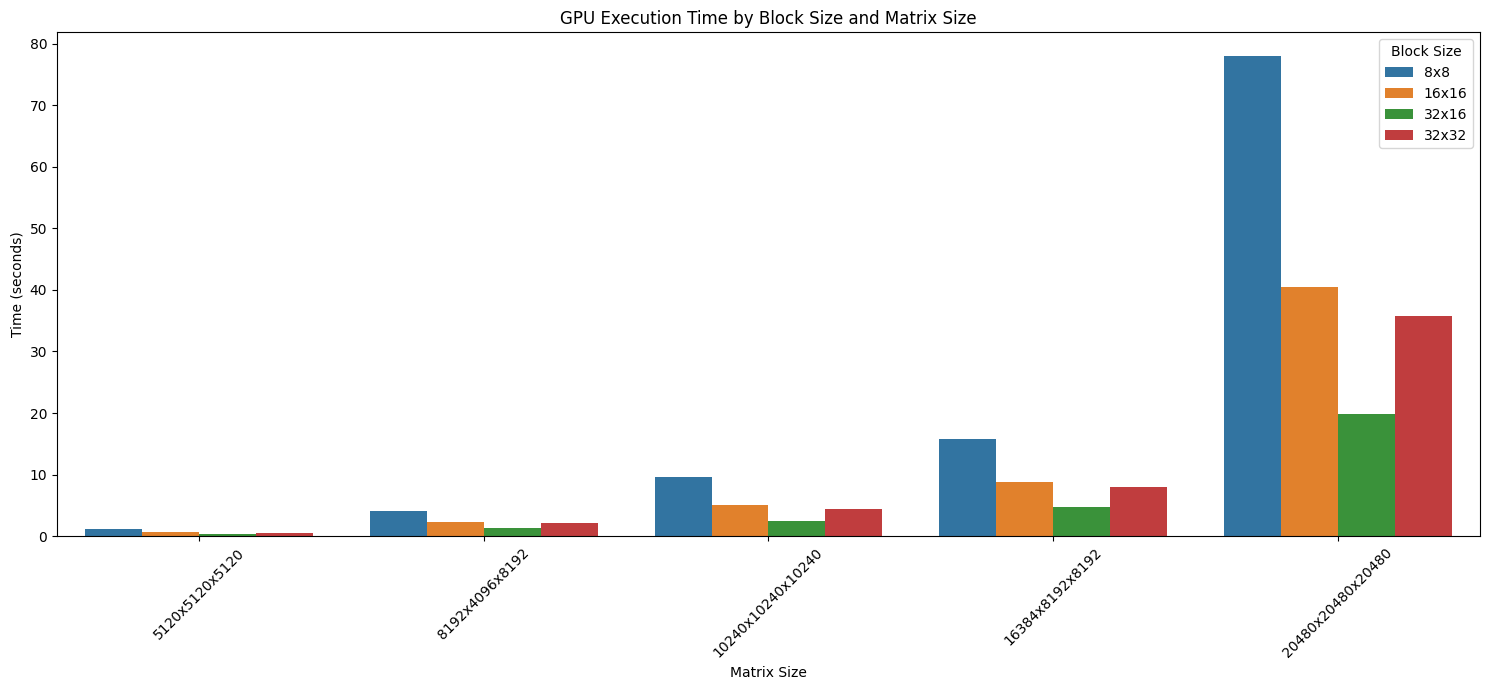

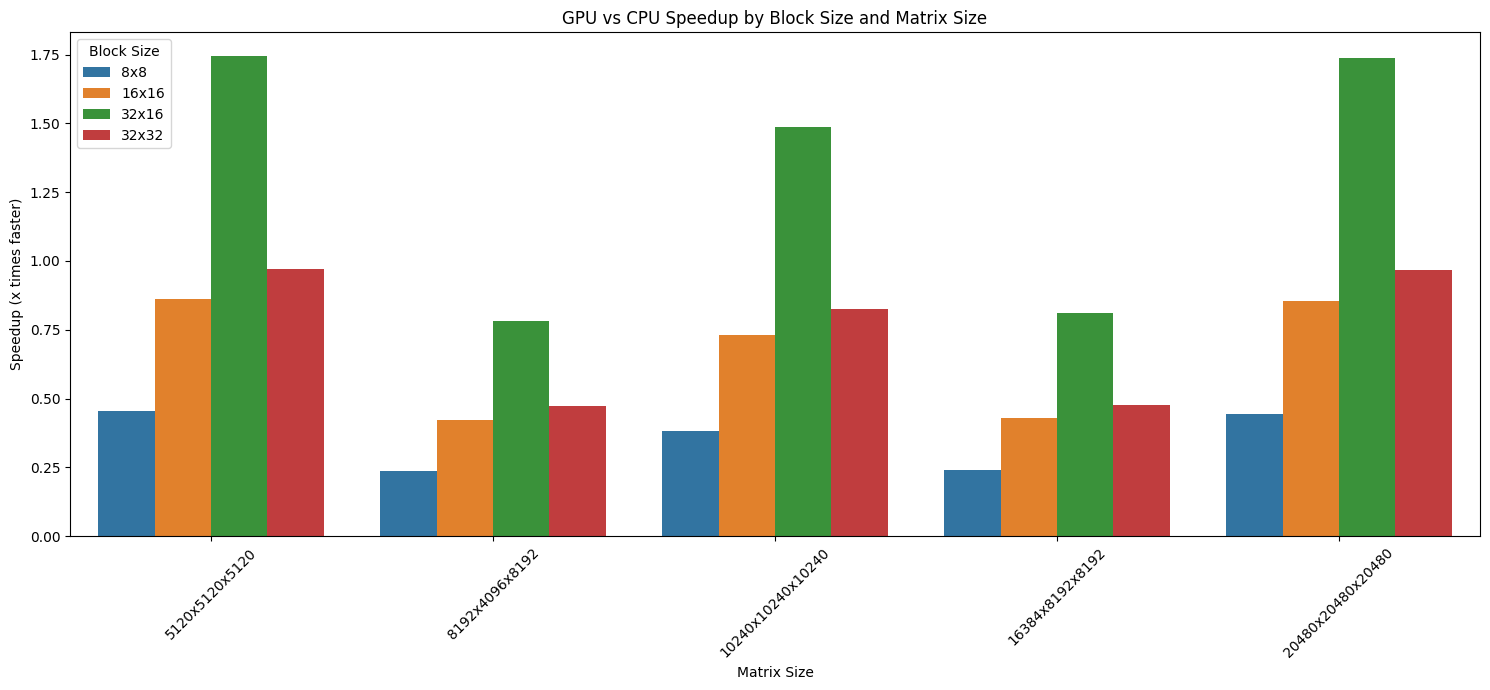

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Work_Aaron/Exercise_2/gpu_experiment_results.csv')

# Performance by block size
plt.figure(figsize=(15, 7))
sns.barplot(data=df, x='Matrix Size', y='GPU Time Mean', hue='Block Size')
plt.title('GPU Execution Time by Block Size and Matrix Size')
plt.xticks(rotation=45)
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

# Speedup comparison
plt.figure(figsize=(15, 7))
sns.barplot(data=df, x='Matrix Size', y='Speedup', hue='Block Size')
plt.title('GPU vs CPU Speedup by Block Size and Matrix Size')
plt.xticks(rotation=45)
plt.ylabel('Speedup (x times faster)')
plt.tight_layout()
plt.show()

<font color='blue'>
Man sieht das es zwischen den verschieden Testfällen sehr grosse Unterschiede gibt. Wenn man die Blöcke anschaut sieht es so aus, dass die schnellsten Berechnungen mit der Definition von 32 x 16 Blöcken gemacht worden ist. Unabhängig der Matrix wurde damit die besten Messungen erzeugt. Man sieht es ziemlich genau in den beiden Graphen. Ich konnte die Daten exportieren, da ich sie nicht visualisieren Konte aus der Remote SSH Verbindung.

Bezüglich dem grossen Unterschied zwischen quadratischen und nicht quadratischen Matrix Multiplikationen: Eine mögliche Erklärung für die bessere GPU-Performance bei der 10240x10240x10240 Matrix im Vergleich zu 8192x4096x8192 liegt in der quadratischen Struktur. Die einheitliche Größe ermöglicht vermutlich eine bessere Verteilung der Berechnungen auf die GPU-Threads und effizientere Speicherzugriffe. Bei der nicht-quadratischen Matrix mit K=4096 entstehen wahrscheinlich unregelmäßigere Zugriffsmuster, die die GPU weniger gut verarbeiten kann als die CPU mit ihrem größeren Cache. Dies könnte den deutlichen Unterschied im Speedup zwischen den beiden Fällen erklären.

</font>

Recherche 32 x 16:
Die 32x16 Blockgröße bietet bei der GPU-Matrixmultiplikation die optimale Performance aufgrund mehrerer wichtiger Hardware-Eigenschaften. Die Breite von 32 Threads passt perfekt zu einem Warp (der kleinsten Ausführungseinheit der GPU), was maximale Ausführungseffizienz gewährleistet. Die Höhe von 16 Threads reduziert dabei Bank-Konflikte im Shared Memory und ermöglicht eine bessere Balance zwischen Parallelität und Ressourcennutzung. Mit insgesamt 512 Threads pro Block wird eine ideale Occupancy erreicht, da mehrere Blocks gleichzeitig auf einem Streaming Multiprocessor (SM) aktiv sein können, was bei größeren Konfigurationen wie 32x32 (1024 Threads) nicht möglich wäre.

Die 32er-Breite unterstützt zudem optimales Memory Coalescing, wodurch zusammenhängende Speicherzugriffe effizient gebündelt werden. Der geringere Registerbedarf im Vergleich zu größeren Blockkonfigurationen erlaubt mehr aktive Warps und damit eine bessere Latenz-Verdeckung. Gleichzeitig wird der Shared Memory effizient genutzt, da genügend Platz für mehrere aktive Blocks bleibt. Diese Kombination aus Warp-Ausrichtung, effizienter Speichernutzung und optimaler Thread-Parallelität führt zu der beobachteten überlegenen Performance bei der Matrixmultiplikation.


<font color='blue'></font>

##### 5.2.2 Shared Memory auf der GPU
Optimiere deine Implementierung von oben indem du das shared Memory der GPU verwendest. Führe wieder mehrere Experimente mit unterschiedlicher Datengrösse durch und evaluiere den Speedup gegenüber der CPU Implementierung.

Links:
* [Best Practices Memory Optimizations](https://docs.nvidia.com/cuda/cuda-c-best-practices-guide/index.html#memory-optimizations)
* [Examples: Matrix Multiplikation und Shared Memory](https://numba.readthedocs.io/en/latest/cuda/examples.html)

Was sind deine Erkenntnisse bzgl. GPU-Memory-Allokation und des Daten-Transferes auf die GPU? Interpretiere deine Resultate.

<font color='blue'>Die Handhabung des Memory wie auch der Datentransfer sind sehr wichtige Punkte, da man ein sehr hohes Potential hat für Optimierung. Daher muss man hier von System zu System die Anforderungen und die Kapabilitäten sehr gut überprüfen. Die Anwendung des Shared Memories wurde bereits in dem vorherigen Kapitel bearbeitet.</font>

##### 5.2.3 Bonus: Weitere Optimierungen
Optimiere deine Implementation von oben weiter. Damit du Erfolg hast, muss der Data-Reuse noch grösser sein.

#### 5.3 NVIDIA Profiler

Benutze einen Performance Profiler von NVIDIA, um Bottlenecks in deinem Code zu identifizieren bzw. unterschiedliche Implementierungen (Blocks, Memory etc.) zu vergleichen. 

* Siehe Beispiel example_profiling_CUDA.ipynb
* [Nsight](https://developer.nvidia.com/nsight-visual-studio-edition) für das Profiling des Codes und die Inspektion der Ergebnisse (neuste Variante)
* [nvprof](https://docs.nvidia.com/cuda/profiler-users-guide/index.html#nvprof-overview)
* [Nvidia Visual Profiler](https://docs.nvidia.com/cuda/profiler-users-guide/index.html#visual)

> Du kannst NVIDIA Nsights Systems und den Nvidia Visual Profiler auf deinem PC installieren und die Leistungsergebnisse aus einer Remote-Instanz visualisieren, auch wenn du keine GPU an/in deinem PC hast. Dafür kannst du die ``*.qdrep`` Datei generieren und danach lokal laden.


Dokumentiere deine Analyse ggf. mit 1-2 Visualisierungen und beschreibe, welche Bottlenecks du gefunden bzw. entschärft hast.

<font color='blue'>
Also Vergleich der verschiedenene Implementationen. (GPU Berechnung müsste viel schneller sein als CPU Berechnung)
1. python script das man verschiedene funktionen brauchen (ohne shared memory, mit shared memory)
2. Visualisierungen der Werte (Vergleich CPU GPU und Profiler Bilder evtl. mit Baseline )
3. Korrektur von GPU Berechnungen, der Speedup müsste viel grösser sein

</font>

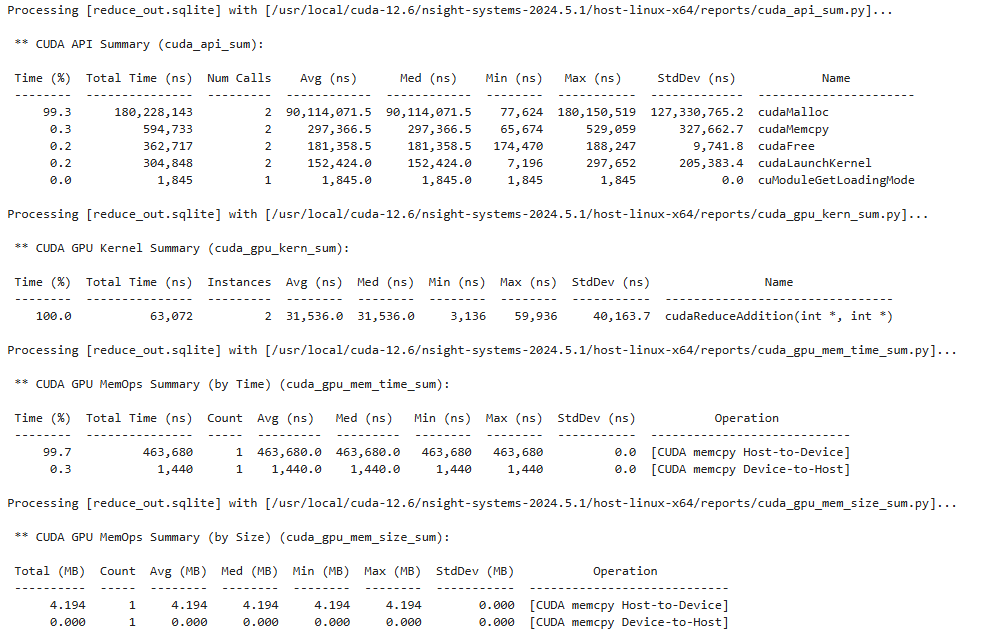

### 6 Beschleunigte Rekonstruktion mehrerer Bilder
#### 6.1 Implementierung
Verwende einige der in bisher gelernten Konzepte, um mehrere Bilder gleichzeitig parallel zu rekonstruieren. Weshalb hast du welche Konzepte für deine Implementierung verwenden? Versuche die GPU konstant auszulasten und so auch die verschiedenen Engines der GPU parallel zu brauchen. Untersuche dies auch für grössere Inputs als die MRI-Bilder.

In [ ]:
### Multithreading mit Python, for example, 3 threads die immer wieder matrix pärchen holen, Cuda Streams, die parallel ihre Arbeit 
### Nvidia MPS falls man Multiprocessing machen möchte, und nicht MultiThreading

<font color='blue'>Antwort hier eingeben</font>

#### 6.2 Analyse
Vergleiche den Speedup für deine parallele Implementierung im Vergleich zur seriellen Rekonstruktion einzelner Bilder. Analysiere und diskutiere in diesem Zusammenhang die Gesetze von Amdahl und Gustafson.

<font color='blue'>Antwort hier eingeben</font>

#### 6.3 Komponentendiagramm

Erstelle das Komponentendiagramm dieser Mini-Challenge für die Rekunstruktion mehrere Bilder mit einer GPU-Implementierung. Erläutere das Komponentendigramm in 3-4 Sätzen.


<font color='blue'>Antwort hier eingeben inkl. Bild(ern).</font>

### 7 Reflexion

Reflektiere die folgenden Themen indem du in 3-5 Sätzen begründest und anhand von Beispielen erklärst.

1: Was sind deiner Meinung nach die 3 wichtigsten Prinzipien bei der Beschleunigung von Code?

<font color='blue'>
    
- Datenlokalität optimieren, der schnellste Speicherzugriff ist der, den man nicht machen muss. Daten nah beieinander halten und Cache Misses vermeiden
- Richtige Parallelisierung wählen, nicht jedes Problem profitiert von mehr Threads. Die Granularität muss zum Problem und zur Hardware passen.
- Algorithmen verbessern, oft bringt ein besserer Algorithmus mehr als aufwändige Hardware-Optimierungen.
</font>

2: Welche Rechenarchitekturen der Flynnschen Taxonomie wurden in dieser Mini-Challenge wie verwendet?

<font color='blue'>
SISD ist der klassische Computer, wie wir ihn kennen: Ein Prozessor führt einen Befehl nach dem anderen aus. Wie ein Koch, der Schritt für Schritt ein Rezept abarbeitet. Das ist einfach zu verstehen und zu programmieren, aber nicht besonders schnell. Man findet das heute noch in einfachen Mikrocontrollern oder wenn Geschwindigkeit nicht so wichtig ist.
<br>    <br>
SIMD ist dagegen wie eine Fließbandproduktion: Der gleiche Arbeitsschritt wird parallel auf viele Daten angewendet. Stell dir vor, du willst 100 Zahlen addieren - SIMD kann 4, 8 oder sogar 16 davon gleichzeitig berechnen. Das macht moderne GPUs so schnell bei Grafikberechnungen und ist auch der Grund, warum sie gut für KI-Training sind. Auch normale CPUs haben heute SIMD-Befehle eingebaut, um Videos schneller zu encodieren oder wissenschaftliche Berechnungen zu beschleunigen.
</font>

3: Haben wir es in dieser Mini-Challenge hauptsächlich mit CPU- oder IO-Bound Problemen zu tun? Nenne Beispiele.

<font color='blue'>
Also bei dieser Mini-Challenge ist der Fokus klar auf CPU-bound Problemen gelegen. Es geht beim Problem darum, dass die Rechenzeit hauptsächlich durch die Prozessorenleistung begrenzt ist. Typische Beispiele dazu sind Komplexe mathematische Berechnungen wie Matrixmultiplikationen, Verschlüsslung von Daten oder Videokompression. 
</font>

4: Wie könnte diese Anwendung in einem Producer-Consumer Design konzipiert werden?

PS. Das Producer-Consumer Design ist ein Modell für parallele Prozesse mit zwei Hauptrollen:
- Der Producer erzeugt Daten und legt sie in einen gemeinsamen Puffer.
- Der Consumer nimmt sie von dort und verarbeitet sie. Der Puffer (meist eine Queue) entkoppelt beide Prozesse, sodass sie unabhängig und mit verschiedenen Geschwindigkeiten arbeiten können.
<br><br>
Ein klassisches Beispiel ist ein Videoplayer: Der Producer lädt Videodaten, während der Consumer sie parallel dekodiert und anzeigt.

<font color='blue'>
Producer:

- Lädt die komprimierten SVD-Komponenten (U, S, V Matrizen)
- Verteilt die Matrizen in sinnvolle Teilaufgaben für die Rekonstruktion
- Legt diese in einer Queue ab

Consumer:

- Mehrere Consumer für parallele Rekonstruktion
- Jeder Consumer nutzt eine der Beschleunigungsmethoden (Numpy, Numba, CuPy etc.)
- Rekonstruieren Teilbereiche des Bildes
- Ein "Collector" Consumer fügt die Teile wieder zusammen

</font>

5: Was sind die wichtigsten Grundlagen, um mehr Performance auf der GPU in dieser Mini-Challenge zu erreichen?

<font color='blue'>
Die wichtigsten Punkte, die mir für gute GPU-Performance einfallen:

- Die Speicherzugriffe scheinen besonders wichtig zu sein - also dass Threads möglichst auf benachbarte Speicherbereiche zugreifen und der schnelle Shared Memory clever genutzt wird.
- Bei den Threads ist es wohl am besten, wenn sie gut ausgelastet sind und möglichst gleichmäßig arbeiten können. Die Block-Größe spielt da eine große Rolle, wie wir in den Tests gesehen haben.
- Einschränkungen von Datentransfer, die Übermittlung zwischen GPU und CPU ist sehr aufwändig - das kostet unnötig Zeit. Besser die Daten auf der GPU lassen, wenn man sie noch braucht.

</font>

6: Reflektiere die Mini-Challenge. Was ist gut gelaufen? Wo gab es Probleme? Wo hast du mehr Zeit als geplant gebraucht? Was hast du dabei gelernt? Was hat dich überrascht? Was hättest du zusätzlich lernen wollen? Würdest du gewisse Fragestellungen anders formulieren? Wenn ja, wie?

<font color='blue'>Antwort hier eingeben</font>